In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def Lanczos_method(symmetric_matrix, first_q, desired_number) :
    Q = np.zeros((np.shape(symmetric_matrix[0])[0],desired_number+1))
    H = np.zeros((desired_number+1,desired_number))
    Q[:,1] = first_q.transpose() / np.linalg.norm(first_q)
    previous_b = 0
    for k in range(1,desired_number) :
        q_k = Q[:,k]
        v = np.dot(symmetric_matrix,q_k)
        a_k = np.dot(q_k.transpose().conjugate(),v)
        v = v - previous_b * Q[:,k-1] - a_k * q_k
        new_b = np.linalg.norm(v)
        Q[:,k+1] = v / new_b
        H[k-1,k-1] = a_k
        H[k-1,k] = new_b
        H[k,k-1] = new_b
        previous_b = new_b
    return H,Q

In [3]:
def Modified_Lanczos_method(symmetric_matrix, first_q, desired_number) :
    Q = np.zeros((np.shape(symmetric_matrix[0])[0],desired_number+1))
    H = np.zeros((desired_number+1,desired_number))
    Q[:,1] = first_q.transpose() / np.linalg.norm(first_q)
    previous_b = 0
    step = 2
    i = 1
    
    for k in range(1,desired_number) :
        q_k = Q[:,k]
        v = np.dot(symmetric_matrix,q_k)
        temp = v
        a_k = np.dot(q_k.transpose().conjugate(),v)
        v = v - previous_b * Q[:,k-1] - a_k * q_k
        if(i % step == 0):
            for j in range(1,k-1):
                b = np.dot(Q[:,j].conjugate().transpose(),temp)
                v = v - b * Q[:,j]
        new_b = np.linalg.norm(v)
        Q[:,k+1] = v / new_b
        H[k-1,k-1] = a_k
        H[k-1,k] = new_b
        H[k,k-1] = new_b
        previous_b = new_b
        i += 1
    return H,Q

In [4]:
n = 2000
m = 200

mrand = np.random.randint(-5,5,(n,n))
symmetric_matrix = (mrand + mrand.conjugate().transpose())
first_q = np.random.randint(-5,5,n)

# Lanczos method
start_time1 = time.time()
H,Q = Lanczos_method(symmetric_matrix, first_q, m)
Q = Q[:,1:]
Tk = np.dot(np.dot(Q.transpose(),symmetric_matrix),Q)
lanczos_eigen_values, lanczos_eigen_vectors = np.linalg.eigh(Tk)
end_time1 = time.time()
lanczos_time = end_time1 - start_time1


# Modified Lanczos method
start_time2 = time.time()
modified_H,modified_Q = Modified_Lanczos_method(symmetric_matrix, first_q, m)
modified_Q = modified_Q[:,1:]
modified_Tk = np.dot(np.dot(modified_Q.transpose(),symmetric_matrix),modified_Q)
modified_lanczos_eigen_values, modified_lanczos_eigen_vectors = np.linalg.eigh(modified_Tk)
end_time2 = time.time()
modified_lanczos_time = end_time2 - start_time2

# Numpy method

start_time3 = time.time()
numpy_eigen_values, numpy_eigen_vectors = np.linalg.eigh(symmetric_matrix)
end_time3 = time.time()
numpy_time = end_time3 - start_time3

print('Lanczos times:', lanczos_time)
print('Modified Lanczos times:', modified_lanczos_time)
print('Numpy time:', numpy_time)

Lanczos times: 3.8949992656707764
Modified Lanczos times: 2.7581310272216797
Numpy time: 0.8907055854797363


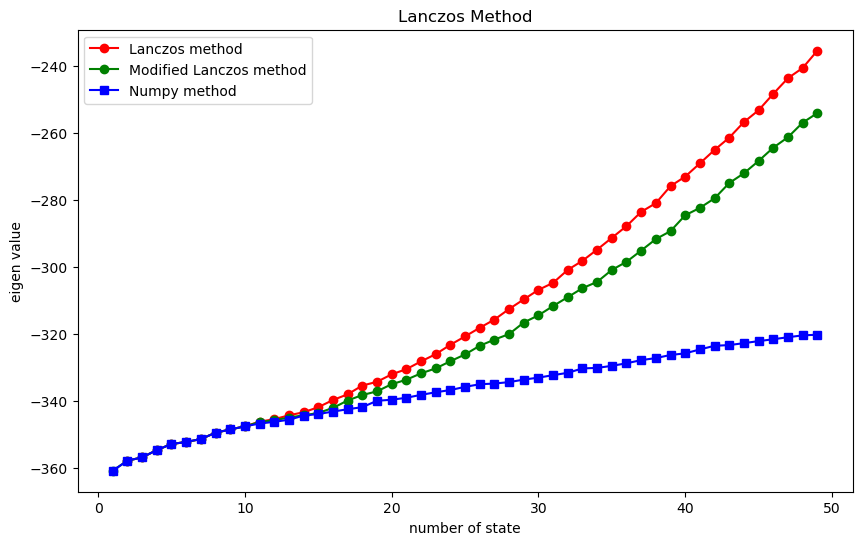

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(2,50), lanczos_eigen_values[2:50], 'ro-', label ='Lanczos method')
plt.plot(np.arange(1,50), modified_lanczos_eigen_values[1:50], 'go-', label ='Modified Lanczos method') 
plt.plot(np.arange(1,50), numpy_eigen_values[1:50], 'bs-', label ='Numpy method') 
plt.xlabel('number of state')
plt.ylabel('eigen value')
plt.title('Lanczos Method')
plt.legend()
plt.show()

In [6]:
lanczos_eigen_values[2]

-357.93397358905867

In [7]:
modified_lanczos_eigen_values[1]

-360.9557085912204

In [8]:
numpy_eigen_values[1]

-360.9557085912317

# B

In [9]:
A1 = np.random.randint(-5,5,(50,50))
A2 = np.random.randint(-5,5,(50,50))
B1 = np.random.randint(-5,5,(100,100))
B2 = np.random.randint(-5,5,(100,100))
g1 = 2
g2 = 3

start_time4 = time.time()
M = g1 * np.kron(A1,B1) + g2 * np.kron(A2,B2)
M = M + M.transpose()
b = np.random.randint(-5,5,5000)

H,Q = Lanczos_method(M, b, 200)
Q = Q[:,1:]
Tk = np.dot(np.dot(Q.transpose(),M),Q)
lanczos_eigen_values, lanczos_eigen_vectors = np.linalg.eigh(Tk)
end_time4 = time.time()
lanczos_time2 = end_time4 - start_time4
print('lanczos time:' , lanczos_time2)

lanczos time: 16.446911096572876


In [10]:
start_time5 = time.time()
M = g1 * np.kron(A1,B1) + g2 * np.kron(A2,B2)
M = M + M.transpose()
b = np.random.rand(5000)
modified_H,modified_Q = Modified_Lanczos_method(M, b, 200)
modified_Q = modified_Q[:,1:]
modified_Tk = np.dot(np.dot(modified_Q.transpose(),M),modified_Q)
modified_lanczos_eigen_values, modified_lanczos_eigen_vectors = np.linalg.eigh(modified_Tk)
end_time5 = time.time()
modified_lanczos_time2 = end_time5 - start_time5
print('modified lanczos time:' , modified_lanczos_time2)


modified lanczos time: 16.079613208770752


In [11]:
start_time6 = time.time()
numpy_energies, numpy_eigen_vectors = np.linalg.eigh(M)
end_time6 = time.time()
numpy_time2 = end_time6 - start_time6
print('numpy time: ' , numpy_time2)

numpy time:  13.972533464431763


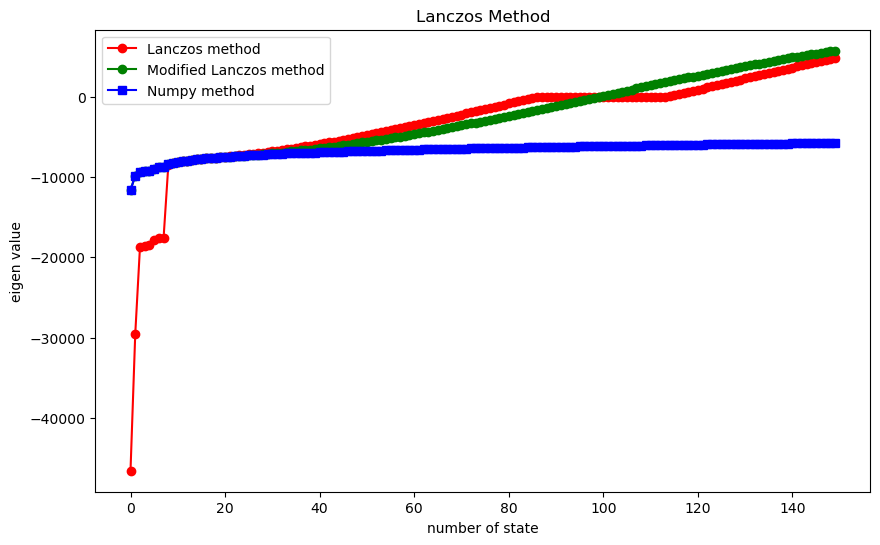

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0,150), lanczos_eigen_values[0:150], 'ro-', label ='Lanczos method')
plt.plot(np.arange(0,150), modified_lanczos_eigen_values[:150], 'go-', label ='Modified Lanczos method') 
plt.plot(np.arange(0,150), numpy_energies[0:150], 'bs-', label ='Numpy method') 
plt.xlabel('number of state')
plt.ylabel('eigen value')
plt.title('Lanczos Method')
plt.legend()
plt.show()

# check for eigen vectors

In [13]:
modified_lanczos_eigen_vectors_final = np.dot(modified_Q,modified_lanczos_eigen_vectors)

In [14]:
np.dot(modified_lanczos_eigen_vectors_final[:,0],numpy_eigen_vectors[:,0])

-1.0000000000000009

## Its 1 so our method is correct

# check eigen values

In [15]:
modified_lanczos_eigen_values[0]

-11645.629415558822

In [16]:
numpy_energies[0]

-11645.629415558808

## they are the same

# C

In [17]:
def Modified_Lanczos_method2(A1, A2, B1, B2, g1, g2, first_q, desired_number,S) :
    Q = np.zeros((np.shape(S[0])[0],desired_number+1))
    H = np.zeros((desired_number+1,desired_number))
    Q[:,1] = first_q.transpose() / np.linalg.norm(first_q)
    previous_b = 0
    step = 2
    i = 1
    
    L1 = np.shape(A1[0])[0]
    L2 = np.shape(B1[0])[0]
    for k in range(1,desired_number) :
        q_k = Q[:,k]
        c_k = np.reshape(q_k,(L1,L2))
        c = g1 * np.dot(A1, np.dot(c_k, B1.transpose())) + g2 * np.dot(A2, np.dot(c_k, B2.transpose()))
        c = c + g1 * np.dot(A1.transpose(), np.dot(c_k, B1)) + g2 * np.dot(A2.transpose(), np.dot(c_k, B2))
        v = np.reshape(c,(-1,))
        a_k = np.dot(q_k.transpose().conjugate(),v)
        v = v - previous_b * Q[:,k-1]- a_k * q_k
        if(i % step == 0):
            for j in range(0,k-2):
                b = np.dot(Q[:,j].conjugate().transpose(),np.reshape(c,(-1,)))
                v = v - b * Q[:,j]
        new_b = np.linalg.norm(v)
        Q[:,k+1] = v.transpose() / new_b
        H[k-1,k-1] = a_k
        H[k-1,k] = new_b
        H[k,k-1] = new_b
        previous_b = new_b
        i += 1
    return H,Q

In [18]:
first_c = np.kron(np.random.randint(-5,5,50),np.random.randint(-5,5,100))
start_time7 = time.time()
modified_H2,modified_Q2 = Modified_Lanczos_method2(A1,A2,B1,B2,g1,g2,b,200,M)
end_time7 = time.time()
modified_Q2 = modified_Q2[:,1:]
modified_Tk2 = np.dot(np.dot(modified_Q2.transpose(),M),modified_Q2)
modified_lanczos_eigen_value2s, modified_lanczos_eigen_vectors2 = np.linalg.eigh(modified_Tk2)
modified_lanczos_time3 = end_time7 - start_time7
print('Second + modified lanczos time:' , modified_lanczos_time3)


Second + modified lanczos time: 0.5905554294586182


In [19]:
modified_lanczos_eigen_value2s[0]

-11645.629415558802

As we see the eigen values are the same but its more way faster 


new method time = 0.5


previous method time = 16.7


numpy method time = 13.1